In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('SBI_train.csv')
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,225.000000,228.899994,224.500000,227.800003,217.400299,6449426
1,2016-01-04,226.949997,226.949997,220.050003,220.699997,210.624420,14092071
2,2016-01-05,222.800003,222.800003,217.000000,217.750000,207.809097,15074848
3,2016-01-06,217.899994,219.899994,216.399994,216.850006,206.950195,11921123
4,2016-01-07,214.000000,214.100006,209.000000,209.550003,199.983444,14342279
...,...,...,...,...,...,...,...
1476,2021-12-24,462.600006,463.600006,452.200012,456.950012,449.928375,13221159
1477,2021-12-27,453.700012,460.500000,450.549988,458.049988,451.011444,8856482
1478,2021-12-28,461.200012,462.899994,459.049988,461.200012,454.113068,8832210
1479,2021-12-29,461.000000,462.149994,451.399994,454.399994,447.417542,11757303


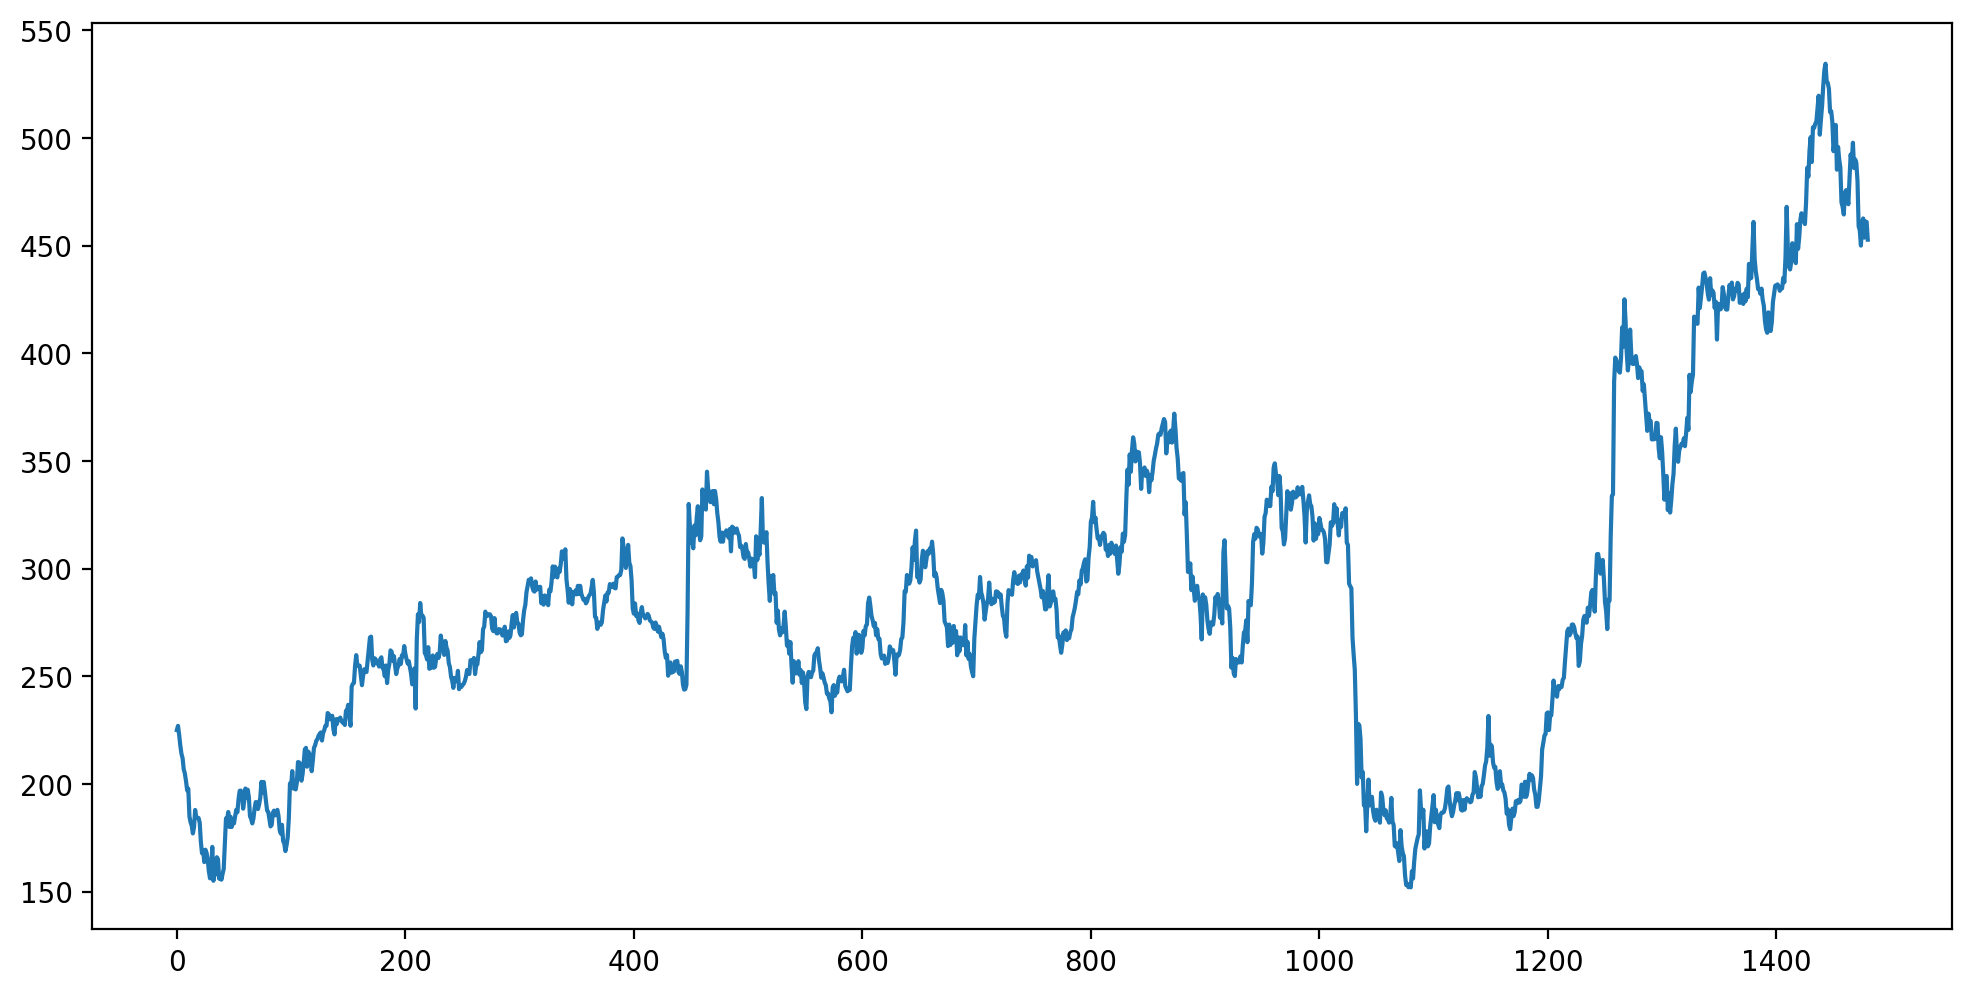

In [3]:
plt.figure(figsize=(12,6),dpi = 200)
plt.plot(df_train['Open'])

In [4]:
df_train.dropna(inplace=True)

In [5]:
x = np.array(df_train['Open'])
x = x.reshape(-1,1)
x

array([[225.      ],
       [226.949997],
       [222.800003],
       ...,
       [461.200012],
       [461.      ],
       [452.75    ]])

In [6]:
# Input from the user
timesteps = 180

In [7]:
X_openseries = []
y_train = []
for i in range(timesteps,len(df_train)):
    X_openseries.append(x[i-timesteps:i, 0])
    y_train.append(x[i, 0])
X_openseries, y_train = np.array(X_openseries), np.array(y_train)

In [8]:
X_openseries

array([[225.      , 226.949997, 222.800003, ..., 254.5     , 257.899994,
        258.799988],
       [226.949997, 222.800003, 217.899994, ..., 257.899994, 258.799988,
        253.949997],
       [222.800003, 217.899994, 214.      , ..., 258.799988, 253.949997,
        253.149994],
       ...,
       [351.25    , 361.      , 354.399994, ..., 461.      , 462.600006,
        453.700012],
       [361.      , 354.399994, 344.      , ..., 462.600006, 453.700012,
        461.200012],
       [354.399994, 344.      , 332.      , ..., 453.700012, 461.200012,
        461.      ]])

In [9]:
y_train

array([253.949997, 253.149994, 250.      , ..., 461.200012, 461.      ,
       452.75    ])

In [10]:
#Input through the user
days_to_pred = 30

In [11]:
df_test = pd.read_csv('SBI_test.csv')
real_openprice = df_test.iloc[:days_to_pred, 1:2].values

In [12]:
#Function used for predictions
def prediction(x,df_train,timesteps,model,days_to_pred):
    pred_dataset = x
    final_preds = []
    for i in range(len(df_train),len(df_train)+days_to_pred):
        X_test = []
        X_test.append(pred_dataset[i-timesteps:i, 0])
        X_test = np.array(X_test)
        predicted_stock_price = model.predict(X_test)
        pred_dataset = np.append(pred_dataset,[predicted_stock_price],axis=0)
        final_preds.append(predicted_stock_price[0])

    plt.plot(real_openprice, color = 'blue', label = 'Real Stock Price')
    plt.plot(final_preds, color = 'green', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    
    if final_preds[0]<=final_preds[-1]:
        print("Upward trend")
    else:
        print("Downward trend")

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
model = RandomForestRegressor(n_estimators=64,max_features=15,oob_score=False)

In [15]:
model.fit(X_openseries,y_train)

RandomForestRegressor(max_features=15, n_estimators=64)

Upward trend


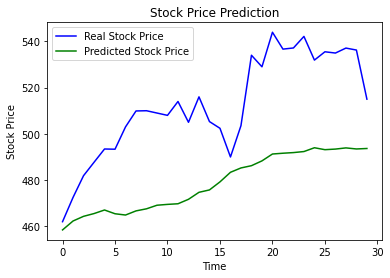

In [16]:
prediction(x,df_train,timesteps,model,days_to_pred)

In [17]:
from sklearn.ensemble import AdaBoostRegressor

In [18]:
model = AdaBoostRegressor(n_estimators=70)

In [19]:
model.fit(X_openseries,y_train)

AdaBoostRegressor(n_estimators=70)

Upward trend


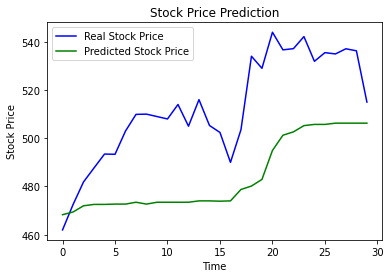

In [20]:
prediction(x,df_train,timesteps,model,days_to_pred)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {"n_estimators":[25,50,75],'max_depth':[2,3,4],'learning_rate':[0.2,0.25,0.3]}

In [26]:
pre_model = GradientBoostingRegressor()

In [27]:
grid = GridSearchCV(pre_model,param_grid)

In [28]:
grid.fit(X_openseries,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.15, 0.2, 0.25],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 75, 100, 125]})

In [29]:
grid.best_params_

{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 50}

In [30]:
model = GradientBoostingRegressor(n_estimators=50,max_depth=3,learning_rate=0.25)

In [31]:
model.fit(X_openseries,y_train)

GradientBoostingRegressor(learning_rate=0.25, n_estimators=50)

Upward trend


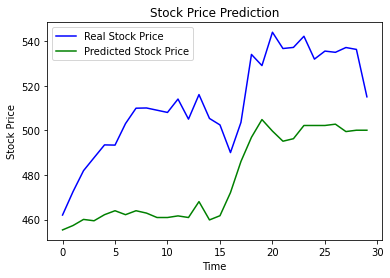

In [32]:
prediction(x,df_train,timesteps,model,days_to_pred)